<a href="https://colab.research.google.com/github/JohnSmith69969/23-S1-A2/blob/main/FIT3181_DeepLearningAssignment1_Official.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:#0b486b">  FIT3181: Deep Learning (2024)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **Prof Dinh Phung** | dinh.phung@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Lim Chern Hong** | lim.chernhong@monash.edu <br/>  <br/>
*Head Tutor 3181:*  **Miss Vy Vo** |  \[v.vo@monash.edu \] <br/>
*Head Tutor 5215:*  **Dr Van Nguyen** |  \[van.nguyen1@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">  Student Information</span>
***
Surname: **Battilana**  <br/>
Firstname: **Callum**    <br/>
Student ID: **33227667**    <br/>
Email: **cbat0012@student.monash.edu**    <br/>
Your tutorial time: **Friday 2pm**    <br/>
***

# <span style="color:#0b486b">Deep Neural Networks</span>
### Due: <span style="color:red">11:55pm Sunday, 8 September 2024</span>  (Sunday)

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **25%** to your final mark. Read the assignment instructions carefully.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to Moodle unit site. **By the due date, you are required to submit one  <span style="color:red; font-weight:bold">single zip file, named xxx_assignment01_solution.zip</span> where `xxx` is your student ID, to the corresponding Assignment (Dropbox) in Moodle**. You can use Google Colab to do Assigmnent 1 but you need to save it to an `*.ipynb` file to submit to the unit Moodle.

**More importantly, if you use Google Colab to do this assignment, you need to first make a copy of this notebook on your Google drive**.

***For example, if your student ID is <span style="color:red; font-weight:bold">12356</span>, then gather all of your assignment solution to folder, create a zip file named <span style="color:red; font-weight:bold">123456_assignment01_solution.zip</span> and submit this file.***

Within this zip folder, you **must** submit the following files:
1.	**Assignment01_solution.ipynb**:  this is your Python notebook solution source file.
1.	**Assignment01_output.html**: this is the output of your Python notebook solution *exported* in html format.
1.	Any **extra files or folder** needed to complete your assignment (e.g., images used in your answers).

Since the notebook is quite big to load and work together, one recommended option is to split solution into three parts and work on them seperately. In that case, replace **Assignment01_solution.ipynb** by three notebooks: **Assignment01_Part1_solution.ipynb**, **Assignment01_Part2_solution.ipynb** and **Assignment01_Part3_solution.ipynb**

**You can run your codes on Google Colab. In this case, you have to make a copy of your Google colab notebook including the traces and progresses of model training before submitting.**



In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math as m
from scipy.stats import norm
import torch
import torch.nn as nn
from torch.nn import Linear, Sequential

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CUDA is not available.  Training on CPU ...


## <span style="color:#0b486b">Part 1: Theory and Knowledge Questions</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 30 points]<span></div>

The first part of this assignment is to demonstrate your knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the lectures and tutorials from weeks 1 to 4**. Going through these materials before attempting this part is highly recommended.

####  <span style="color:red">**Question 1.1**</span> **Activation function plays an important role in modern Deep NNs. For each of the activation functions below, state its output range, find its derivative (show your steps), and plot the activation fuction and its derivative**

<span style="color:red">**(a)**</span> Exponential linear unit (ELU): $\text{ELU}(x)=\begin{cases}
0.1\left(\exp(x)-1\right) & \text{if}\,x\leq0\\
x & \text{if}\,x>0
\end{cases}$
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

$\text{Range of } ELU(x): (-1,∞)$

**Working Out:**

as x tends towards negative infinity, exp(x) tends to zero. So smallest value for ELU(x) is minus 1. As x tends towards positive infinity, ELU(x) tends towards infinity. So max value is infinity.

$\frac{dELU(x)}{dx} = \begin{cases}
0.1\left(\exp(x)\right) & \text{if}\,x\leq0\\
1 & \text{if}\,x>0
\end{cases}$

**Working Out:**

When $x ≤ 0$ $\frac{dELU(x)}{dx} = 0.1exp(x)$ (Addition Rule).

When $x > 0$ $\frac{dELU(x)}{dx} = 1$ (derivative of $x$ is 1).

<span style="color:red">**(b)**</span> Gaussian Error Linear Unit (GELU): $\text{GELU}(x)=x\Phi(x)$ where $\Phi(x)$ is the `probability cummulative function` of the standard Gaussian distribution or $\Phi(x) = \mathbb{P}\left(X\leq x\right)$ where $X \sim N\left(0,1\right)$. In addition, the GELU activation fuction (the link for the [main paper](https://arxiv.org/pdf/1606.08415v5.pdf)) has been widely used in the state-of-the-art Vision for Transformers (e.g., here is the link for [the main ViT paper](https://arxiv.org/pdf/2010.11929v2.pdf)).
<div style="text-align: right"><span style="color:red">[1.5 points]</span></div>

$\text{Range of } GELU(x): [-0.17,∞)$

**Working Out:**

We take derivative of GELU and set it equal to zero. Approximating GELU(x) in the hyperbolic tangent form, we can solve for the minimum of GELU approximately. https://onlinelibrary.wiley.com/doi/10.1155/2023/4229924


$\frac{dGELU(x)}{dx} = \Phi(x) + x(P(x=X))\ where\  x \sim N\left(0,1\right)$

**Working Out:**

Using product rule:
$\frac{dGELU(x)}{dx} = \Phi(x) + x(\frac{dΦ}{dx})$

$\Phi(x) = ∫_{-\infty}^{x} P(x=X)$

$\frac{dΦ}{dx} = P(x=X)$, so $\frac{dGELU(x)}{dx} = \Phi(x) + x(P(x=X))$

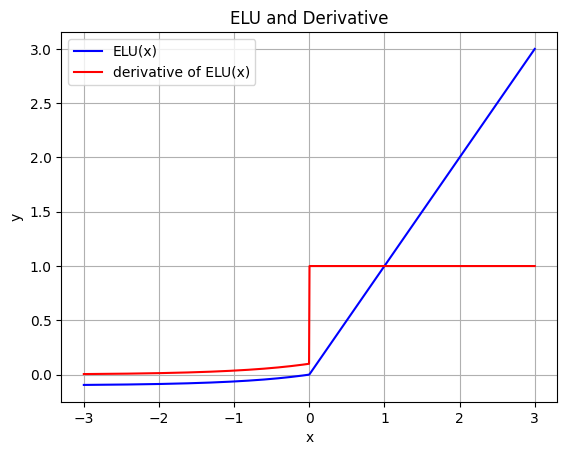

In [ ]:
#Question 1.1(a) Plotting ELU

# Define the piecewise function
def ELU(x):
    if x <= 0:
        return 0.1*(m.exp(x)-1)
    else:
        return x

def dELU(x):
    if x <= 0:
        return 0.1*m.exp(x)
    else:
      return 1

# Create x-values
x_values = np.linspace(-3, 3, 1000)

# Evaluate the function for each x-value
y1_values = [ELU(x) for x in x_values]
y2_values = [dELU(x) for x in x_values]

# Plot the function
plt.plot(x_values, y1_values, label='ELU(x)', color = "blue")
plt.plot(x_values, y2_values, label='derivative of ELU(x)', color = "red")

# Customize the plot (optional)
plt.xlabel('x')
plt.ylabel('y')
plt.title('ELU and Derivative')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


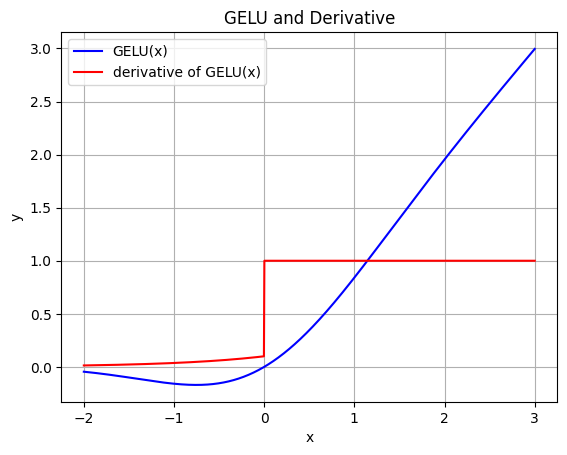

In [ ]:
#Question 1.1(b) Plotting GELU

# Define the piecewise function
def GELU(x):
    return x*norm.cdf(x)
def dGELU(x):
    return norm.cdf(x) + x*norm.pdf(x)

# Create x-values
x_values = np.linspace(-2, 3, 1000)

# Evaluate the function for each x-value
y1_values = [GELU(x) for x in x_values]
y2_values = [dELU(x) for x in x_values]

# Plot the function
plt.plot(x_values, y1_values, label='GELU(x)', color = "blue")
plt.plot(x_values, y2_values, label='derivative of GELU(x)', color = "red")

# Customize the plot (optional)
plt.xlabel('x')
plt.ylabel('y')
plt.title('GELU and Derivative')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

*Write your answer here. You can add more cells if needed.*









####  <span style="color:red">**Question 1.2:**</span> **Assume that we feed a data point $x$ with a ground-truth label $y=3$ to the feed-forward neural network with the `ReLU activation` function as shown in the following figure**


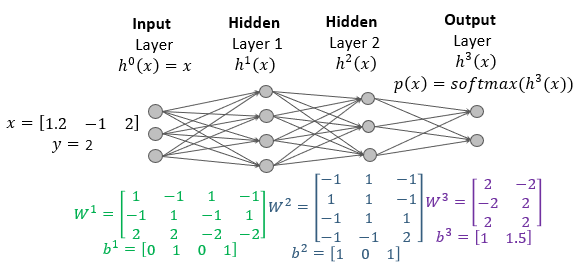

In [ ]:
x = tf.constant([[1.2,-1,2]], dtype=tf.float32)
h0 = x
W1 = tf.constant([[1,-1,1,-1],[-1,1,-1,1],[2,2,-2,-2]], dtype=tf.float32)
W2 = tf.constant([[-1,1,-1],[1,1,-1],[-1,1,1], [-1,-1,2]], dtype=tf.float32)
W3 = tf.constant([[2,-2],[-2,2],[2,2]], dtype=tf.float32)
b1 = tf.constant([[0,1,0,1]], dtype=tf.float32)
b2 = tf.constant([[1,0,1]], dtype=tf.float32)
b3 = tf.constant([[1,1.5]], dtype=tf.float32)

relu_layer = tf.keras.layers.ReLU()
h1 = relu_layer(tf.matmul(h0,W1)+b1)
h2 = relu_layer(tf.matmul(h1,W2)+b2)
h3 = tf.matmul(h2,W3)+b3
probabilities = tf.nn.softmax(h3)


In [ ]:
print(f"h1:{h1}")
print(f"h2: {h2}")
print(f"h3: {h3}")
print(f"probabilities: {probabilities}")

h1:[[6.2 2.8 0.  0. ]]
h2: [[0. 9. 0.]]
h3: [[-17.   19.5]]
probabilities: [[1.4068618e-16 1.0000000e+00]]


<span style="color:red">**(a)**</span>  What is the numerical value of the latent presentation $h^1(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$h̄^1(x) = h^0(x)W^1+b^1$

$h^1(x) = ReLU(h̄^1) = (6.2,2.8,0,0)$

<span style="color:red">**(b)**</span>  What is the numerical value of the latent presentation $h^2(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$h̄^2(x) = h^1(x)W^2+b^2$

$h^2(x) = ReLU(h̄^2) = (0,9,0)$

<span style="color:red">**(c)**</span>  What is the numerical value of the logit $h^3(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$h^3(x) = h^2(x)W^3+b^3 = (-17,19.5)$

<span style="color:red">**(d)**</span>  What is the corresonding prediction probabilities $p(x)$?
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$p(x) = Softmax(h3) = [0,  1]$

<span style="color:red">**(e)**</span>  What is the predicted label $\widehat{y}$? Is it a correct and an incorect prediction? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

It predicts that y=2 which is correct.


<span style="color:red">**(f)**</span>  What is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$? Remind that $y=2$.
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

$CE = -log(1) = 0$

<span style="color:red">**(g)**</span>  Why is the cross-entropy loss caused by the feed-forward neural network at $(x,y)$ (i.e., $\text{CE}(1_y, p(x))$) always non-negative? When does this $\text{CE}(1_y, p(x))$ loss get the value $0$? Note that you need to answer this question for a general pair $(x,y)$ and a general feed-forward neural network with, for example $M=4$ classes?   
<div style="text-align: right"><span style="color:red">[1 point]</span></div>

As $CE(1_{y},p(x)) = -log(p_{y}(x))$ (ie. the negative log of the probability that it predicts the characteristic y correctly based on the training data), it will always be non-negative since probability values are between 0 and 1, and the logarithm of those probabilities will therefore be less than or equal to 0. So the negative of the logarithm will always be positive.


*You must show both formulas and numerical results for earning full mark. Although it is optional, it is great if you show your PyTorch code for your computation.*

####  <span style="color:red">**Question 1.3:**</span>
For **Question 1.3**, you have two options:
* **(1)** *perform the forward, backward propagation, and SGD update for `one mini-batch`* (**10 points**), or
* **(2)** *manually implement a feed-forward neural network* that can work on real tabular datasets (**20 points**).

You can choose either **(1)** or **(2)** to proceed.   

### <span style="color:red">**Option 1**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 10 points]<span></div>

**Assume that we are constructing a multilayered feed-forward neural network for a classification problem with three classes where the model parameters will be generated randomly using your student ID. The architecture of this network is $3 (Input)\rightarrow 5(ELU) \rightarrow 3(Output)$ as shown in the following figure. Note that the ELU has the same formula as the one in Q1.1.**


We feed a batch $X$ with the labels $Y$ as shown in the figure. Answer the following questions.

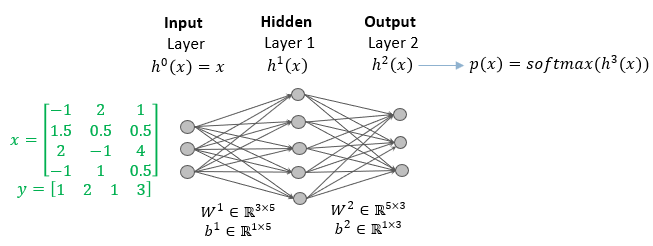

**You need to show both formulas, numerical results, and your PyTorch code for your computation for earning full marks.**

In [ ]:
import torch
student_id = 33227667           #insert your student id here for example 1234
torch.manual_seed(student_id)

In [ ]:
#Code to generate random matrices and biases for W1, b1, W2, b2




**Forward propagation**

<span style="color:red">**(a)**</span>  What is the value of $\bar{h}^{1}(x)$ (the pre-activation values of $h^1$)?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>


In [ ]:
#Show your code




<span style="color:red">**(b)**</span>  What is the value of $h^{1}(x)$?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>

In [ ]:
#Show your code



<span style="color:red">**(c)**</span>  What is the predicted value $\widehat{y}$?
<div style="text-align: right"><span style="color:red">[0.5 point]</span></div>

In [ ]:
#Show your code



(d) Suppose that we use the cross-entropy (CE) loss. What is the value of the CE loss $l$ incurred by the mini-batch?

[0.5 point]

In [ ]:
#Show your code



**Backward propagation**

<span style="color:red">**(e)**</span> What are the derivatives $\frac{\partial l}{\partial h^{2}},\frac{\partial l}{\partial W^{2}}$, and $\frac{\partial l}{\partial b^{2}}$?
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
#Show your code



<span style="color:red">**(f)**</span> What are the derivatives $\frac{\partial l}{\partial h^{1}}, \frac{\partial l}{\partial \bar{h}^{1}},\frac{\partial l}{\partial W^{1}}$, and $\frac{\partial l}{\partial b^{1}}$?
<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
#Show your code



**SGD update**

<span style="color:red">**(g)**</span> Assume that we use SGD with learning rate $\eta=0.01$ to update the model parameters. What are the values of $W^2, b^2$ and $W^1, b^1$ after updating?
<div style="text-align: right"><span style="color:red">[2 points]</span></div>

In [ ]:
#Show your code



### <span style="color:red">**Option 2**</span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this option: 20 points]<span></div>

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

**In Option 2, you need to implement a feed-forward NN manually using PyTorch and auto-differentiation of PyTorch. We then manually train the model on the MNIST dataset**.

We first download the `MNIST` dataset and preprocess it.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert the image to a tensor with shape [C, H, W]
    transforms.Normalize((0.5,), (0.5,)),  # Normalize to [-1, 1]
    transforms.Lambda(lambda x: x.view(28*28)) # Flatten the tensor to shape [-1,HW]
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])


Each data point has dimension `[28,28]`. We need to flatten it to a vector to input to our FFN.

In [ ]:
train_dataset.data = train_data.data.view(-1, 28*28)
test_dataset.data = test_data.data.view(-1, 28*28)

train_data, train_labels = train_dataset.data, train_dataset.targets
test_data, test_labels = test_dataset.data, test_dataset.targets
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])


In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

**Develop the feed-forward neural networks**

**(a)** You need to develop the class `MyLinear` with the following skeleton. You need to declare the weight matrix and bias of this linear layer.

<div style="text-align: right"><span style="color:red">[3 points]</span></div>

In [ ]:
class MyLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super(MyLinear, self).__init__()


        self.W = nn.Parameter(torch.randn(input_size, output_size, requires_grad=True)) # Initialize with requires_grad=True
        self.b = nn.Parameter(torch.randn(output_size, requires_grad=True)) # Initialize with requires_grad=True


    def forward(self, x):

        return torch.matmul(x, self.W) + self.b

**(b)** You need to develop the class `MyFFN` with the following skeleton

<div style="text-align: right"><span style="color:red">[7 points]</span></div>

In [ ]:

class MyFFN(torch.nn.Module):
  def __init__(self, input_size, num_classes, hidden_sizes, act = torch.nn.ReLU()):
    """
    input_size: the size of the input
    num_classes: the number of classes
    act is the activation function
    hidden_sizes is the list of hidden sizes
    for example input_size = 3, hidden_sizes = [5, 7], num_classes = 4, and act = torch.nn.ReLU()
    means that we are building up a FFN with the confirguration
    (3 (Input) -> 5 (ReLU) -> 7 (ReLU) -> 4 (Output))
    """
    super(MyFFN).__init__()
    self.input_size = input_size
    self.num_classes = num_classes
    self.act = act
    self.hidden_sizes = hidden_sizes
    self.num_layers = len(hidden_sizes) + 1
    self.vw = None
    self.vb = None
    self.gammaw = None
    self.gammab = None




  def __repr__(self):
    return (f"{self.layers}")

  def create_FFN(self):
    """
    This function creates the feed-forward neural network
    We stack many MyLinear layers
    """
    self.layers = []

    hidden_sizes = [self.input_size] + self.hidden_sizes + [self.num_classes]
    for i in range(self.num_layers):
      self.layers.append(MyLinear(hidden_sizes[i], hidden_sizes[i+1]))

  def forward(self,x):

    """
    This implements the forward propagation of the batch x
    This needs to return the prediction probabilities of x
    """
    for i in range(self.num_layers-1):
      layer = self.layers[i]
      x = layer.forward(x)
      if i < self.num_layers - 1:
        self.act(x)
      else:
        x = tf.nn.softmax(x)
    return x


  def compute_loss(self, x, y):
    """
    This function computes the cross-entropy loss
    """
    loss_fn = torch.nn.CrossEntropyLoss()
    loss = loss_fn(x, y.long().squeeze())
    return loss

  def update_SGD(self, x, y, learning_rate):
    """
    Performs a step of SGD
    """
    x = self.forward(x)
    l = self.compute_loss(x,y)
    l.backward()
    # Make sure gradients are enabled for input

    for i in range(self.num_layers-1):

        self.layers[i].W.data = self.layers[i].W.data - learning_rate * self.layers[i].W.grad
        self.layers[i].b.data = self.layers[i].b.data - learning_rate * self.layers[i].b.grad


        if self.layers[i].W.grad is not None:
          self.layers[i].W.grad.zero_()
        if self.layers[i].b.grad is not None:
          self.layers[i].b.grad.zero_()

  def update_SGDwithMomentum(self, x, y, learning_rate = 0.01, momentum = 0.9):
    """
    This function updates the model parameters using SGD with momentum using the batch (x,y)
    """
    x = self.forward(x)
    l = self.compute_loss(x,y)
    l.backward()

    if self.vw is None and self.vb is None:
      self.vw = [torch.zeros_like(layer.W) for layer in self.layers[:-1]]
      self.vb = [torch.zeros_like(layer.b) for layer in self.layers[:-1]]


    for i in range(self.num_layers-1):
      self.vw[i] = (1-momentum)*self.vw[i] + momentum*self.layers[i].W.grad
      self.vb[i] = (1-momentum)*self.vb[i] + momentum*self.layers[i].b.grad


      self.layers[i].W.data = self.layers[i].W.data - learning_rate*self.vw[i]
      self.layers[i].b.data = self.layers[i].b.data - learning_rate*self.vb[i]

      if self.layers[i].W.grad is not None:
        self.layers[i].W.grad.zero_()
      if self.layers[i].b.grad is not None:
        self.layers[i].b.grad.zero_()


  def update_AdaGrad(self, x, y, learning_rate = 0.01):
    """
    This function updates the model parameters using AdaGrad using the batch (x,y)
    """
    x = self.forward(x)
    l = self.compute_loss(x,y)
    l.backward()

    if self.gammaw is None and self.gammab is None:
      self.gammaw = [torch.zeros_like(layer.W) for layer in self.layers[:-1]]
      self.gammab = [torch.zeros_like(layer.b) for layer in self.layers[:-1]]

    for i in range(self.num_layers-1):
        self.gammaw[i] = self.gammaw[i] + np.multiply(self.layers[i].W.grad, self.layers[i].W.grad )
        self.gammab[i] = self.gammab[i] + np.multiply(self.layers[i].b.grad, self.layers[i].b.grad )


        self.layers[i].W.data = self.layers[i].W.data - np.multiply(learning_rate/np.sqrt(1e-6+self.gammaw[i]), self.layers[i].W.grad )
        self.layers[i].b.data = self.layers[i].b.data - np.multiply(learning_rate/np.sqrt(1e-6+self.gammab[i]), self.layers[i].b.grad )

        if self.layers[i].W.grad is not None:
          self.layers[i].W.grad.zero_()
        if self.layers[i].b.grad is not None:
          self.layers[i].b.grad.zero_()



In [ ]:
myFFN = MyFFN(input_size = 28*28, num_classes = 26, hidden_sizes = [100, 100], act = torch.nn.ReLU)
myFFN.create_FFN()


**(c)** Write the code to evaluate the accuracy of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def compute_acc(model, loader):
  # Change the model to the evaluation mode (important for the model with batch-norm and drop-out layers)
  # In test phase, we don't need to compute gradients (for memory efficiency)
  with torch.no_grad():
    corrects = 0
    totals =0
    for (batchX, batchY) in loader:
      batchX, batchY = batchX.to(device).type(torch.float32), batchY.to(device).type(torch.long)
      outputs = model.forward(batchX.type(torch.float32)) #feed batch to the model
      totals += batchY.size(0) #accumulate totals with the current batch size
      predicted = torch.argmax(outputs.data, 1) #get the predicted class
      corrects += (predicted == batchY.type(torch.long)).sum().item() #accumulate correct predictions
  acc = float(corrects)/totals #compute the accuracy
  return acc

**(c)** Write the code to evaluate the loss of the current `myFFN` model on a data loader (e.g., train_loader or test_loader).

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def compute_loss(model, loader):
  loss = 0
  # Set model to eval mode for inference

  with torch.no_grad():  # No need to track gradients for validation
    for (batchX, batchY) in loader:
      loss_fn = nn.CrossEntropyLoss()
      # Move data to the same device as the model
      batchX, batchY = batchX.to(device).type(torch.float32), batchY.to(device).type(torch.long)
      loss += loss_fn(model.forward(batchX), batchY)
  # Set model back to train mode
  return float(loss)/len(loader)

Train on the `MNIST` data with 50 epochs using `updateSGD`.

In [ ]:

myFFN = MyFFN(input_size=28*28, num_classes=26, hidden_sizes=[100, 100], act=torch.nn.ReLU)
myFFN.create_FFN()
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        myFFN.update_SGD(x, y, learning_rate = 0.01)
    train_acc = compute_acc(myFFN,train_loader)
    train_loss = compute_loss(myFFN, train_loader)
    test_acc = compute_acc(myFFN, test_loader)
    test_loss = compute_loss(myFFN, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch 1/20, Train Loss: 10.7514, Train Acc: 83.65%, Test Loss: 10.3889, Test Acc: 84.76%
Epoch 2/20, Train Loss: 6.6133, Train Acc: 85.97%, Test Loss: 6.7694, Test Acc: 86.43%
Epoch 3/20, Train Loss: 5.4629, Train Acc: 85.96%, Test Loss: 5.5786, Test Acc: 86.77%
Epoch 4/20, Train Loss: 4.3090, Train Acc: 86.30%, Test Loss: 4.5344, Test Acc: 86.71%
Epoch 5/20, Train Loss: 5.1288, Train Acc: 81.02%, Test Loss: 5.2941, Test Acc: 81.52%
Epoch 6/20, Train Loss: 3.3604, Train Acc: 85.86%, Test Loss: 3.6340, Test Acc: 86.13%
Epoch 7/20, Train Loss: 3.2726, Train Acc: 83.81%, Test Loss: 3.3752, Test Acc: 84.36%
Epoch 8/20, Train Loss: 2.4232, Train Acc: 86.55%, Test Loss: 2.5891, Test Acc: 86.83%
Epoch 9/20, Train Loss: 2.1672, Train Acc: 86.56%, Test Loss: 2.2260, Test Acc: 87.10%
Epoch 10/20, Train Loss: 1.6504, Train Acc: 88.18%, Test Loss: 1.7492, Test Acc: 88.17%
Epoch 11/20, Train Loss: 1.9492, Train Acc: 85.04%, Test Loss: 2.0631, Test Acc: 85.01%
Epoch 12/20, Train Loss: 1.4516, Train 

**(d)** Implement the function `updateSGDMomentum` in the class and train the model with this optimizer in `50` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
# check if CUDA is available

myFFN = MyFFN(input_size = 28*28, num_classes = 26, hidden_sizes = [100, 100], act = torch.nn.ReLU)
myFFN.create_FFN()
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      myFFN.update_SGDwithMomentum(x, y, learning_rate = 0.001)
    train_acc = compute_acc(myFFN, train_loader)
    train_loss = compute_loss(myFFN, train_loader)
    test_acc = compute_acc(myFFN, test_loader)
    test_loss = compute_loss(myFFN, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")

Epoch 1/20, Train Loss: 28.2709, Train Acc: 69.77%, Test Loss: 25.7007, Test Acc: 71.80%
Epoch 2/20, Train Loss: 19.5177, Train Acc: 76.81%, Test Loss: 17.9593, Test Acc: 78.33%
Epoch 3/20, Train Loss: 16.1430, Train Acc: 79.46%, Test Loss: 15.0824, Test Acc: 80.64%
Epoch 4/20, Train Loss: 14.0024, Train Acc: 81.23%, Test Loss: 13.2601, Test Acc: 81.86%
Epoch 5/20, Train Loss: 12.5712, Train Acc: 82.46%, Test Loss: 11.9997, Test Acc: 83.20%
Epoch 6/20, Train Loss: 11.4993, Train Acc: 83.41%, Test Loss: 11.1185, Test Acc: 84.00%
Epoch 7/20, Train Loss: 10.7852, Train Acc: 83.82%, Test Loss: 10.4713, Test Acc: 84.25%
Epoch 8/20, Train Loss: 10.0736, Train Acc: 84.19%, Test Loss: 9.8410, Test Acc: 84.79%
Epoch 9/20, Train Loss: 9.4228, Train Acc: 84.56%, Test Loss: 9.3064, Test Acc: 84.80%
Epoch 10/20, Train Loss: 8.8720, Train Acc: 84.95%, Test Loss: 8.7999, Test Acc: 85.00%
Epoch 11/20, Train Loss: 8.4135, Train Acc: 85.47%, Test Loss: 8.3777, Test Acc: 85.82%
Epoch 12/20, Train Loss: 7

**(e)** Implement the function `updateAdagrad` in the class and train the model with this optimizer in `50` epochs. You can update the corresponding function in the `MyFNN` class.

<div style="text-align: right"><span style="color:red">[2.5 points]</span></div>

In [ ]:
myFFN = MyFFN(input_size = 28*28, num_classes = 26, hidden_sizes = [100, 100], act = torch.nn.ReLU)
myFFN.create_FFN()
num_epochs = 20
for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
      myFFN.update_AdaGrad(x, y)
    train_acc = compute_acc(myFFN, train_loader)
    train_loss = compute_loss(myFFN, train_loader)
    test_acc = compute_acc(myFFN, test_loader)
    test_loss = compute_loss(myFFN, test_loader)
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc*100:.2f}%, Test Loss: {test_loss:.4f}, Test Acc: {test_acc*100:.2f}%")


Epoch 1/20, Train Loss: 16.2858, Train Acc: 79.20%, Test Loss: 15.7497, Test Acc: 79.57%
Epoch 2/20, Train Loss: 12.9929, Train Acc: 82.36%, Test Loss: 12.4496, Test Acc: 82.79%
Epoch 3/20, Train Loss: 11.5864, Train Acc: 83.64%, Test Loss: 11.1870, Test Acc: 83.76%
Epoch 4/20, Train Loss: 10.6420, Train Acc: 84.32%, Test Loss: 10.2257, Test Acc: 84.59%
Epoch 5/20, Train Loss: 9.9720, Train Acc: 84.82%, Test Loss: 9.6472, Test Acc: 85.25%
Epoch 6/20, Train Loss: 9.4493, Train Acc: 85.37%, Test Loss: 9.2668, Test Acc: 85.30%
Epoch 7/20, Train Loss: 9.0598, Train Acc: 85.75%, Test Loss: 8.9418, Test Acc: 85.63%
Epoch 8/20, Train Loss: 8.7792, Train Acc: 85.65%, Test Loss: 8.6656, Test Acc: 85.91%
Epoch 9/20, Train Loss: 8.4795, Train Acc: 86.11%, Test Loss: 8.4764, Test Acc: 85.89%
Epoch 10/20, Train Loss: 8.1679, Train Acc: 86.15%, Test Loss: 8.1077, Test Acc: 86.22%
Epoch 11/20, Train Loss: 7.9237, Train Acc: 86.33%, Test Loss: 7.9545, Test Acc: 86.33%
Epoch 12/20, Train Loss: 7.7103, 

## <span style="color:#0b486b">Part 2: Deep Neural Networks (DNN) </span>
<div style="text-align: right"><span style="color:red; font-weight:bold">[Total marks for this part: 25 points]<span></div>

The second part of this assignment is to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 1 to 2**. Going through these materials before attempting this assignment is highly recommended.

In the second part of this assignment, you are going to work with the FashionMNIST dataset for image recognition task. It has the exact same format as MNIST (70,000 grayscale images of 28 × 28 pixels each with 10 classes), but the images represent fashion items rather than handwritten digits, so each class is more diverse, and the problem is significantly more challenging than MNIST.

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.manual_seed(1234)

**Load the Fashion MNIST using `torchvision`**

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset_orgin = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

train_dataset_orgin.data = train_dataset_orgin.data.view(-1, 28*28)
test_dataset.data = test_dataset.data.view(-1, 28*28)

print(train_dataset_orgin.data.shape, train_dataset_orgin.targets.shape)
print(test_dataset.data.shape, test_dataset.targets.shape)

N = len(train_dataset_orgin)
print(f"Number of training samples: {N}")
N_train = int(0.9*N)
N_val = N - N_train
print(f"Number of training samples: {N_train}")
print(f"Number of validation samples: {N_val}")

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset_orgin, [N_train, N_val])


train_loader = DataLoader(dataset=train_dataset_orgin, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

100%|██████████| 26421880/26421880 [00:01<00:00, 17359894.01it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305452.18it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5644891.49it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13876784.70it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

torch.Size([60000, 28, 28]) torch.Size([60000])
torch.Size([10000, 28, 28]) torch.Size([10000])
torch.Size([60000, 784]) torch.Size([60000])
torch.Size([10000, 784]) torch.Size([10000])
Number of training samples: 60000
Number of training samples: 54000
Number of validation samples: 6000


####  <span style="color:red">**Question 2.1:**</span> Write the code to visualize a mini-batch in `train_loader` including its images and labels.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

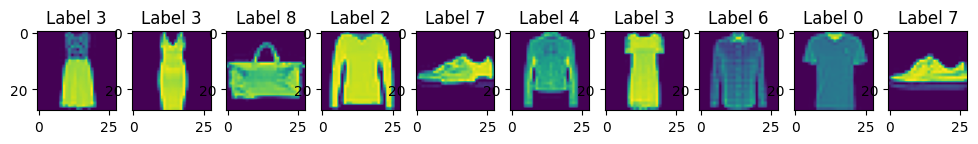

In [ ]:
train_feature, train_label = next(iter(train_loader))


fig, axs = plt.subplots(1, 10, figsize=(12, 4))  # Create subplots

for i in range(10):
  batch, label = train_feature[i,].view(28,28),train_label[i]
  img = batch
  axs[i].imshow(img)
  axs[i].set_title(f'Label {label}')


plt.show()

####<span style="color:red">**Question 2.2:**</span> Write the code for the feed-forward neural net using PyTorch

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

We now develop a feed-forward neural network with the architecture $784 \rightarrow 40(ReLU) \rightarrow 30(ReLU) \rightarrow 10(softmax)$. You can choose your own way to implement your network and an optimizer of interest. You should train model in $50$ epochs and evaluate the trained model on the test set.

In [ ]:


n_features= 784
n_classes= 10

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
dnn_model = Sequential(Linear(n_features,40), nn.ReLU(),
                       Linear(40,30), nn.ReLU(),
                       Linear(30, n_classes)).to(device) #load the model to device
dnn_model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=30, bias=True)
  (3): ReLU()
  (4): Linear(in_features=30, out_features=10, bias=True)
)

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def compute_loss(model, loss_fn, loader):
  loss = 0
  for (batchX, batchY) in loader:
    batchX, batchY = batchX.squeeze().to(device), batchY.to(device)
    loss += loss_fn(model(batchX.type(torch.float32)), batchY.type(torch.long))
  return float(loss)/len(loader)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def compute_acc(model, loader):
  # Change the model to the evaluation mode (important for the model with batch-norm and drop-out layers)
  model.eval()
  # In test phase, we don't need to compute gradients (for memory efficiency)
  with torch.no_grad():
    corrects = 0
    totals =0
    for (batchX, batchY) in loader:
      batchX, batchY = batchX.squeeze().to(device), batchY.to(device)
      outputs = model(batchX.type(torch.float32)) #feed batch to the model
      totals += batchY.size(0) #accumulate totals with the current batch size
      predicted = torch.argmax(outputs.data, 1) #get the predicted class
      corrects += (predicted == batchY.type(torch.long)).sum().item() #accumulate correct predictions
  acc = float(corrects)/totals #compute the accuracy
  return acc

In [ ]:

# Loss and optimizer
learning_rate = 0.005
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(dnn_model.parameters(), lr=learning_rate)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def train_model(dnn_model, num_epochs, optimizer, loss_fn):
  train_on_gpu = torch.cuda.is_available()

  if not train_on_gpu:
      print('CUDA is not available.  Training on CPU ...')
  else:
      print('CUDA is available!  Training on GPU ...')
  history = dict() #declare the dictionary history with the keys:val_loss, val_acc, train_loss, train_acc
  history['train_loss'] = list()
  history['train_acc'] = list()
  history['test_loss'] = list()
  history['test_acc'] = list()
  for epoch in range(num_epochs):
      #Set our model in training mode
      dnn_model.train()
      for i, (X, y) in enumerate(train_loader):

          X, y = X.squeeze().to(device), y.to(device)
          # Forward pass
          outputs = dnn_model(X.type(torch.float32))
          loss = loss_fn(outputs, y.type(torch.long))
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      #losses and accuracies for epoch
      train_loss = compute_loss(dnn_model, loss_fn, train_loader)
      train_acc = compute_acc(dnn_model, train_loader)
      test_loss = compute_loss(dnn_model, loss_fn, test_loader)
      test_acc = compute_acc(dnn_model, test_loader)
      print(f"Epoch {epoch+1}/{num_epochs}")
      print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% test loss= {test_loss:.4f} - test acc= {test_acc*100:.2f}%")
      history['train_loss'].append((train_loss,dnn_model))
      history['train_acc'].append((train_acc,dnn_model))
      history['test_loss'].append((test_loss,dnn_model))
      history['test_acc'].append((test_acc,dnn_model))
  return history

CUDA is not available.  Training on CPU ...
Epoch 1/20
train loss= 0.4086 - train acc= 85.17% test loss= 0.4511 - test acc= 84.16%
Epoch 2/20
train loss= 0.3939 - train acc= 85.65% test loss= 0.4494 - test acc= 84.22%
Epoch 3/20
train loss= 0.3820 - train acc= 86.48% test loss= 0.4506 - test acc= 84.33%
Epoch 4/20
train loss= 0.3253 - train acc= 88.14% test loss= 0.3909 - test acc= 86.12%
Epoch 5/20
train loss= 0.3142 - train acc= 88.29% test loss= 0.4008 - test acc= 85.97%
Epoch 6/20
train loss= 0.3376 - train acc= 87.35% test loss= 0.4136 - test acc= 85.45%
Epoch 7/20
train loss= 0.3367 - train acc= 87.61% test loss= 0.4223 - test acc= 85.34%
Epoch 8/20
train loss= 0.3423 - train acc= 87.23% test loss= 0.4272 - test acc= 85.22%
Epoch 9/20
train loss= 0.3005 - train acc= 88.81% test loss= 0.3960 - test acc= 86.33%
Epoch 10/20
train loss= 0.3055 - train acc= 88.77% test loss= 0.4046 - test acc= 85.74%
Epoch 11/20
train loss= 0.3103 - train acc= 88.34% test loss= 0.4168 - test acc= 85.1

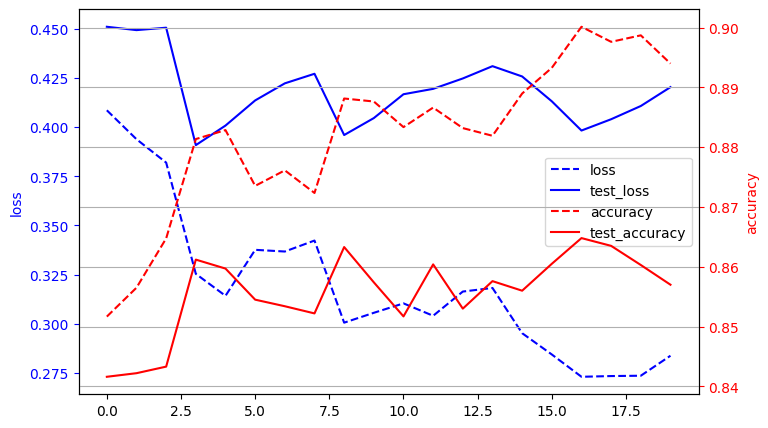

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

his = train_model(dnn_model, 20, optimizer, loss_fn)
train_l = [loss[0] for loss in his['train_loss']]
train_a = [acc[0] for acc in his['train_acc']]
test_l = [loss[0] for loss in his['test_loss']]
test_a = [acc[0] for acc in his['test_acc']]
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ln1 = ax.plot(train_l , 'b--',label='loss')
ln2 = ax.plot(test_l, 'b-',label='test_loss')
ax.set_ylabel('loss', color='blue')
ax.tick_params(axis='y', colors="blue")

ax2 = ax.twinx()
ln3 = ax2.plot(train_a, 'r--',label='accuracy')
ln4 = ax2.plot(test_a, 'r-',label='test_accuracy')
ax2.set_ylabel('accuracy', color='red')
ax2.tick_params(axis='y', colors="red")

lns = ln1 + ln2 + ln3 + ln4
labels = [l.get_label() for l in lns]
ax.legend(lns, labels, loc=7)
plt.grid(True)
plt.show()

####  <span style="color:red">**Question 2.3:**</span> Tuning hyper-parameters with grid search
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


Assume that you need to tune the number of neurons on the first and second hidden layers $n_1 \in \{20, 40\}$, $n_2 \in \{20, 40\}$  and the used activation function  $act \in \{sigmoid, tanh, relu\}$. The network has the architecture pattern $784 \rightarrow n_1 (act) \rightarrow n_2(act) \rightarrow 10(softmax)$ where $n_1, n_2$, and $act$ are in their grides. Write the code to tune the hyper-parameters $n_1, n_2$, and $act$. Note that you can freely choose the optimizer and learning rate of interest for this task.

In [ ]:
from operator import itemgetter

def train_model_q2(n1,n2,act, num_epochs, loss_fn):
  histories = list()
  n_features= 784
  n_classes= 10
  for actfun in act:
    for num1 in n1:
      for num2 in n2:
          device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
          dnn_model = Sequential(Linear(n_features,num1), actfun,
                                Linear(num1,num2), actfun,
                                Linear(num2, n_classes)).to(device) #load the model to device

# Loss and optimizer
          optimizer = torch.optim.Adam(dnn_model.parameters(), lr=learning_rate)
          history = train_model(dnn_model, num_epochs, optimizer, loss_fn)
          histories.append((max(history["test_loss"], key = itemgetter(0))))
  return histories

In [ ]:
n1 = [20,40]
n2 = [20,40]
act = [nn.Sigmoid(), nn.Tanh(), nn.ReLU()]

learning_rate = 0.005
loss_fn = nn.CrossEntropyLoss()

best_model = max(train_model_q2(n1,n2,act, 10, loss_fn), key = itemgetter(0))
print(f"Best model: {best_model}")

CUDA is not available.  Training on CPU ...
Epoch 1/10
train loss= 0.5524 - train acc= 80.93% test loss= 0.5783 - test acc= 79.93%
Epoch 2/10
train loss= 0.4889 - train acc= 82.95% test loss= 0.5310 - test acc= 81.68%
Epoch 3/10
train loss= 0.4309 - train acc= 84.81% test loss= 0.4835 - test acc= 82.95%
Epoch 4/10
train loss= 0.4184 - train acc= 85.10% test loss= 0.4745 - test acc= 83.06%
Epoch 5/10
train loss= 0.4124 - train acc= 85.06% test loss= 0.4757 - test acc= 82.75%
Epoch 6/10
train loss= 0.4105 - train acc= 85.31% test loss= 0.4769 - test acc= 83.09%
Epoch 7/10
train loss= 0.3901 - train acc= 86.16% test loss= 0.4531 - test acc= 83.49%
Epoch 8/10
train loss= 0.3963 - train acc= 86.05% test loss= 0.4619 - test acc= 83.99%
Epoch 9/10
train loss= 0.3778 - train acc= 86.59% test loss= 0.4442 - test acc= 84.44%
Epoch 10/10
train loss= 0.3740 - train acc= 86.63% test loss= 0.4416 - test acc= 84.67%
CUDA is not available.  Training on CPU ...
Epoch 1/10
train loss= 0.4940 - train acc

####  <span style="color:red">**Question 2.4:**</span> Implement the loss with the form: $loss(p,y)=CE(1_{y},p)+\lambda H(p)$ where $H(p)=-\sum_{i=1}^{M}p_{i}\log p_{i}$ is the entropy of $p$, $p$ is the prediction probabilities of a data point $x$ with the ground-truth label $y$, $1_y$ is an one-hot label, and $\lambda >0$ is a trade-off parameter. Set $\lambda = 0.1$ to train a model.

<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>


In [ ]:
def loss_entropy(x=None, y=None, lambda_value=0.1):
    eps = 1E-10
    p = torch.nn.functional.softmax(x, dim=1)
    losses = -torch.log(p[range(len(y)),y.long()]+eps)-lambda_value*(p*torch.log(p+eps)).sum(dim=1)
    loss = torch.mean(losses)
    return loss

In [ ]:
# Loss and optimizer
n_features= 784
n_classes= 10

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


learning_rate = 0.005
loss_fn = loss_entropy
optimizer = torch.optim.Adam(best_model
                             .parameters(), lr=learning_rate)
train_model(best_model, 10, optimizer, loss_fn)

NameError: name 'best_model' is not defined

####  <span style="color:red">**Question 2.5:**</span> Experimenting with **sharpness-aware minimization** technique
<div style="text-align: right"> <span style="color:red">[5 points]</span> </div>

Sharpness-aware minimization (SAM) (i.e., [link for main paper](https://openreview.net/pdf?id=6Tm1mposlrM) from Google Deepmind) is a simple yet but efficient technique to improve the generalization ability of deep learning models on unseen data examples. In your research or your work, you might potentially use this idea. Your task is to read the paper and implement *Sharpness-aware minimization (SAM)*. Finally, you need to apply SAM to the best architecture found in **Question 2.3**.   

## <span style="color:#0b486b">Part 3: Convolutional Neural Networks and Image Classification</span>

**<div style="text-align: right"><span style="color:red">[Total marks for this part: 45 points]</span></div>**

The third part of this assignment is to demonstrate your basis knowledge in deep learning that you have acquired from the lectures and tutorials materials. Most of the contents in this assignment are drawn from **the tutorials covered from weeks 3 to 6**. Going through these materials before attempting this assignment is highly recommended.

**The dataset used for this part is a specific dataset for this unit consisting of approximately $10,000$ images of $20$ classes of Animals, each of which has approximately 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1aEkxNWaD02Z8ZNvZzeMefUoY97C-3wTG/view?usp=drive_link) if you want to do your assignment on your machine.**


In [20]:
import os
import requests
import tarfile
import time
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
import torch
import PIL.Image
import pathlib
from torchsummary import summary
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(1234)

CUDA is not available.  Training on CPU ...


Download the dataset to the folder of this Google Colab.

In [21]:
!gdown --fuzzy https://drive.google.com/file/d/1aEkxNWaD02Z8ZNvZzeMefUoY97C-3wTG/view?usp=drive_link

!gdown --fuzzy https://drive.google.com/file/d/1qdElRqDS4TitXfv_iG_TFQSi9QIfy4uM/view?usp=drive_link # backup url

Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1aEkxNWaD02Z8ZNvZzeMefUoY97C-3wTG

but Gdown can't. Please check connections and permissions.
Downloading...
From (original): https://drive.google.com/uc?id=1qdElRqDS4TitXfv_iG_TFQSi9QIfy4uM
From (redirected): https://drive.google.com/uc?id=1qdElRqDS4TitXfv_iG_TFQSi9QIfy4uM&confirm=t&uuid=c46afd0a-c6ec-4480-9815-b5dd876a79ed
To: /content/Animals_Dataset.zip
100% 643M/643M [00:09<00:00, 64.3MB/s]


We unzip the dataset to the folder.

In [29]:
!unzip -q Animals_Dataset.zip

replace FIT5215_Dataset/birds/n01532829_10006.JPEG? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [24]:
data_dir = "./FIT5215_Dataset"

# We resize the images to [3,64,64]
transform = transforms.Compose([transforms.Resize((64,64)),  #resises the image so it can be perfect for our model.
                                      transforms.RandomHorizontalFlip(), # FLips the image w.r.t horizontal axis
                                      #transforms.RandomRotation(4),     #Rotates the image to a specified angel
                                      #transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)), #Performs actions like zooms, change shear angles.
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2), # Set the color params
                                      transforms.ToTensor(), # convert the image to tensor so that it can work with torch
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),  # Normalize the images, each R,G,B value is normalized with mean=0.5 and std=0.5
                                      ])


# Load the dataset using torchvision.datasets.ImageFolder and apply transformations
dataset = datasets.ImageFolder(data_dir, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.9 * len(dataset))
valid_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, valid_size])

# Example of DataLoader creation for training and validation
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("Number of instance in train_set: %s" % len(train_dataset))
print("Number of instance in val_set: %s" % len(val_dataset))

Number of instance in train_set: 8519
Number of instance in val_set: 947


In [25]:
class_names = ['bird', 'bottle', 'bread', 'butterfly', 'cake', 'cat', 'chicken', 'cow', 'dog', 'duck',
                  'elephant', 'fish', 'handgun', 'horse', 'lion', 'lipstick', 'seal', 'snake', 'spider', 'vase']

In [26]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy() # convert images to numpy for display

In [27]:
import math

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

def visualize_data(images, categories, images_per_row = 8):
    class_names = ['bird', 'bottle', 'bread', 'butterfly', 'cake', 'cat', 'chicken', 'cow', 'dog', 'duck',
                  'elephant', 'fish', 'handgun', 'horse', 'lion', 'lipstick', 'seal', 'snake', 'spider', 'vase']
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(1.5*images_per_row, 1.5*n_rows))
    fig.patch.set_facecolor('white')
    for i in range(n_images):
        plt.subplot(n_rows, images_per_row, i+1)
        plt.xticks([])
        plt.yticks([])
        imshow(images[i])
        class_index = categories[i]
        plt.xlabel(class_names[class_index])
    plt.show()

In [28]:
visualize_data(images, labels)

KeyboardInterrupt: 

<Figure size 1200x600 with 0 Axes>

**For questions 3.1 to 3.7, you'll need to write your own model in a way that makes it easy for you to experiment with different architectures and parameters. The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters. Below are descriptions of some parameters for `YourModel`:**

1. `Block confirguration`: Our network consists of many blocks. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, max pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and padding = 1, and all max pool layers have strides $(2, 2)$, kernel size $2$, and padding = 0. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `list_feature_maps`: the number of feature maps in the blocks of the network. For example, if `list_feature_maps = [16, 32, 64]`, our network has three blocks with the input_channels or number of feature maps are `16, 32`, and `64` respectively.
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout.
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `false` means not using batch normalization.
5. `use_skip`: the skip connection is used in the blocks or not. Setting this to `true` means that we use `1x1` Conv2D with `strides=2` for the skip connection.
6. At the end, you need to apply `global average pooling (GAP)` (`AdaptiveAvgPool2d((1, 1))`) to flatten the 3D output tensor before defining the output linear layer for predicting the labels.



Here is the model confirguration of `YourCNN` if the `list_feature_maps = [16, 32, 64]` and `batch_norm = true`.

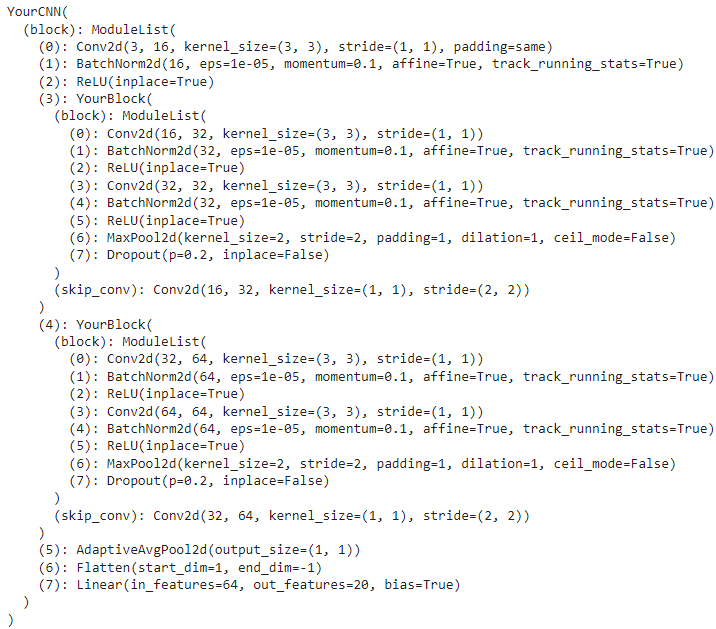

<span style="color:red">**Question 3.1:**</span> **You need to implement the aforementioned CNN**.

**First, you need to implement the block of our CNN in the class `YourBlock`. You can ignore `use_skip` and `skip connection` for simplicity. However, you cannot earn full marks for this question.**

<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

In [ ]:

class YourBlock(nn.Module):
  skip_conv = nn.Conv2d(32,64, kernel_size=(1,1), stride=(2,2))
  def __init__(self, in_feature_maps, out_feature_maps, drop_rate = 0.2, batch_norm = True, use_skip = True):
    super(YourBlock, self).__init__()
    self.use_skip = use_skip
    block = [
        nn.Conv2d(in_feature_maps, out_feature_maps, kernel_size = (3,3), stride = (1,1)),
        nn.ReLU(inplace = True),
        nn.Conv2d(out_feature_maps, out_feature_maps, kernel_size = (3,3), stride = (1,1)),
        nn.ReLU(inplace = True),
        nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 1, dilation = 1),
        nn.Dropout(drop_rate, inplace = False)
    ]
    if batch_norm == True:
        block = [
            nn.Conv2d(in_feature_maps, out_feature_maps, kernel_size = (3,3), stride = (1,1)),
            nn.BatchNorm2d(out_feature_maps, eps = 1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace = True),
            nn.Conv2d(out_feature_maps, out_feature_maps, kernel_size = (3,3), stride = (1,1)),
            nn.BatchNorm2d(out_feature_maps, eps = 1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(inplace = True),
            nn.MaxPool2d(kernel_size = 2, stride = 2, padding = 1, dilation = 1),
            nn.Dropout(drop_rate, inplace = False)
        ]
    self.block = nn.ModuleList(block)
    if self.use_skip == True:
      self.skip_conv = nn.Conv2d(in_feature_maps, out_feature_maps, kernel_size=(1,1), stride=(2,2))

  def forward(self, x):
    for layer in self.block:
      x = layer(x)
    return x

**Second, you need to use the above `YourBlock` to implement the class `YourCNN`**.

<div style="text-align: right"> <span style="color:red">[6 points]</span> </div>

In [ ]:
class YourCNN(nn.Module):
  def __init__(self, list_feature_maps = [16, 32, 64], drop_rate = 0.2, batch_norm= True, use_skip = True):
    super(YourCNN, self).__init__()
    layers = []
    layers.append(nn.Conv2d(3, list_feature_maps[0], kernel_size = (3,3), stride = (1,1), padding ="same"))

    if batch_norm:
       layers.append(nn.BatchNorm2d(list_feature_maps[0], eps = 1e-05, momentum=0.1, affine=True, track_running_stats=True))
    layers.append(nn.ReLU(inplace = True))
    for i in range(len(list_feature_maps)-1):
      layers.append(YourBlock(list_feature_maps[i], list_feature_maps[i+1], drop_rate, batch_norm, use_skip))

    layers.append(nn.AdaptiveAvgPool2d(output_size = (1,1)))
    layers.append(nn.Flatten(start_dim = 1, end_dim = -1))
    layers.append(nn.Linear(in_features = list_feature_maps[-1], out_features = 20))
    self.block = nn.ModuleList(layers)

  def forward(self, x):

    for layer in self.block:
      x = layer(x)
    return x


**We declare `my_cnn` from `YourCNN` as follows**.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
my_cnn = YourCNN(list_feature_maps = [32, 64], batch_norm = True, use_skip = False)
my_cnn = my_cnn.to(device)
print(my_cnn)

**We declare the optimizer and the loss function.**

In [ ]:
# Loss and optimizer
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_cnn.parameters(), lr=learning_rate)

**Here are the codes to compute the loss and accuracy.**

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def compute_loss(model, loss_fn, loader):
  loss = 0
  # Set model to eval mode for inference
  model.eval()
  with torch.no_grad():  # No need to track gradients for validation
    for (batchX, batchY) in loader:
      # Move data to the same device as the model
      batchX, batchY = batchX.to(device).type(torch.float32), batchY.to(device).type(torch.long)
      loss += loss_fn(model(batchX), batchY)
  # Set model back to train mode
  model.train()
  return float(loss)/len(loader)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def compute_acc(model, loader):
    correct = 0
    totals = 0
    # Set model to eval mode for inference
    model.eval()
    for (batchX, batchY) in loader:
        # Move batchX and batchY to the same device as the model
        batchX, batchY = batchX.to(device).type(torch.float32), batchY.to(device)
        outputs = model(batchX)  # feed batch to the model
        totals += batchY.size(0)  # accumulate totals with the current batch size
        predicted = torch.argmax(outputs.data, 1)  # get the predicted class
        # Move batchY to the same device as predicted for comparison
        correct += (predicted == batchY).sum().item()
    return correct / totals

**Here is the code to train our model.**

In [30]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def fit(model= None, train_loader = None, valid_loader= None, optimizer = None,
        num_epochs = 20, verbose = True, seed= 1234):
  torch.manual_seed(seed)
  # Move the model to the device before initializing the optimizer
  model.to(device) # Move the model to the GPU

  if optimizer == None:
    optim = torch.optim.Adam(model.parameters(), lr = 0.001) # Now initialize optimizer with model on GPU
  else:
    optim = optimizer
  history = dict()
  history['val_loss'] = list()
  history['val_acc'] = list()
  history['train_loss'] = list()
  history['train_acc'] = list()

  for epoch in range(num_epochs):
    model.train()
    for (X, y) in train_loader:
      # Move input data to the same device as the model
      X,y = X.to(device), y.to(device)
      # Forward pass
      outputs = model(X.type(torch.float32)) # X is already on the correct device
      loss = loss_fn(outputs, y.type(torch.long))
      # Backward and optimize
      optim.zero_grad()
      loss.backward()
      optim.step()
      #losses and accuracies for epoch
    val_loss = compute_loss(model, loss_fn, valid_loader)
    val_acc = compute_acc(model, valid_loader)
    train_loss = compute_loss(model, loss_fn, train_loader)
    train_acc = compute_acc(model, train_loader)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    if not verbose: #verbose = True means we do show the training information during training
      print(f"Epoch {epoch+1} / {num_epochs}")
      print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% - valid loss= {val_loss:.4f} - valid acc= {val_acc*100:.2f}%")
  return history

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
my_cnn = YourCNN(list_feature_maps = [32, 64], batch_norm = True, use_skip = True)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_cnn.parameters(), lr=learning_rate)

history = fit(model= my_cnn, train_loader=train_loader, valid_loader = val_loader, optimizer = optimizer, verbose = False)

<span style="color:red">**Question 3.2:**</span> **Now, let us tune the number of blocks $use\_skip \in \{true,false\}$ and $learning\_rate \in \{0.001, 0.0005\}$. Write your code for this tuning and report the result of the best model on the testing set. Note that you need to show your code for tuning and evaluating on the test set to earn the full marks. During tuning, you can set the instance variable `verbose` of your model to `True` for not showing the training details of each epoch.**

Note that for this question, depending on your computational resource, you can choose `list_feature_maps= [32, 64]` or `list_feature_maps= [16, 32, 64]`.

<div style="text-align: right"> <span style="color:red">[3 points]</span> </div>

In [ ]:
learning_rates = [0.001,0.0005]
use_skips = [True, False]
losses = []
for _ in use_skips:
  for learning_rate in learning_rates:
    loss_fn = nn.CrossEntropyLoss()
    my_cnn = YourCNN(list_feature_maps = [32, 64], batch_norm = True, use_skip = _)
    optimizer = torch.optim.Adam(my_cnn.parameters(), lr=learning_rate)
    history = fit(model= my_cnn, train_loader=train_loader, num_epochs=5,valid_loader = val_loader, optimizer = optimizer, verbose = True)
    losses.append((my_cnn, history["val_loss"][9]))

best_model = max(losses, key = itemgetter(1))
print(f"Best model: {best_model}")




**Please note that you are struggling in implementing the aforementioned CNN. You can use the MiniVGG network in our labs for doing the following questions. However, you cannot earn any mark for 3.1 and 3.2.**

<span style="color:red">**Question 3.3:**</span> **Exploring Data Mixup Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for data mixup [link for main paper](https://openreview.net/pdf?id=r1Ddp1-Rb) and a good article [article link](https://www.inference.vc/mixup-data-dependent-data-augmentation/).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

In [ ]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
def mixup_data(x, y, alpha=1.0, use_cuda=False):
    '''Returns mixed inputs, pairs of targets, and lambda'''
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1

    batch_size = x.size()[0]
    if use_cuda:
        index = torch.randperm(batch_size).cuda()
    else:
        index = torch.randperm(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

def fit_mixup(model= None, train_loader = None, valid_loader= None, optimizer = None,
        num_epochs = 20, verbose = True, seed= 1234):
  torch.manual_seed(seed)
  # Move the model to the device before initializing the optimizer
  model.to(device) # Move the model to the GPU

  if optimizer == None:
    optim = torch.optim.Adam(model.parameters(), lr = 0.001) # Now initialize optimizer with model on GPU
  else:
    optim = optimizer
  history = dict()
  history['val_loss'] = list()
  history['val_acc'] = list()
  history['train_loss'] = list()
  history['train_acc'] = list()

  for epoch in range(num_epochs):
    model.train()
    for (X, y) in train_loader:
      # Move input data to the same device as the model
      X,y = X.to(device), y.to(device)
      inputs, y_a, y_b, lam = mixup_data(X, y)
      # Assuming your input images are 28x28
      outputs = model(inputs)
      loss = mixup_criterion(loss_fn, outputs, y_a, y_b, lam)

      # Backward and optimize
      optim.zero_grad()
      loss.backward()
      optim.step()
      #losses and accuracies for epoch
    val_loss = compute_loss(model, loss_fn, valid_loader)
    val_acc = compute_acc(model, valid_loader)
    train_loss = compute_loss(model, loss_fn, train_loader)
    train_acc = compute_acc(model, train_loader)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    if not verbose: #verbose = True means we do show the training information during training
      print(f"Epoch {epoch+1} / {num_epochs}")
      print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% - valid loss= {val_loss:.4f} - valid acc= {val_acc*100:.2f}%")
  return history

In [ ]:

learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
my_cnn = YourCNN(list_feature_maps = [32, 64], batch_norm = True, use_skip = True)
optimizer = torch.optim.Adam(my_cnn.parameters(), lr=learning_rate)
history_mixup = fit_mixup(model= my_cnn, train_loader=train_loader, valid_loader = val_loader, optimizer = optimizer, verbose = False)

<span style="color:red">**Question 3.4:**</span> **Exploring CutMix Technique for Improving Generalization Ability.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

Data mixup is another super-simple technique used to boost the generalization ability of deep learning models. You need to incoroporate data mixup technique to the above deep learning model and experiment its performance. There are some papers and documents for data mixup as follows:
- Main paper for Cutmix [link for main paper](https://arxiv.org/pdf/1905.04899v2) and a good article [article link](https://shorturl.at/TNwjv).

You need to extend your model developed above, train a model using data mixup, and write your observations and comments about the result.

In [ ]:
def rand_bbox(size, lam):
    W = size[2]
    H = size[3]
    cut_rat = np.sqrt(1. - lam)
    cut_w = W * cut_rat
    cut_h = H * cut_rat

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)

    bbx1 = int(np.clip(cx - cut_w // 2, 0, W))
    bby1 = int(np.clip(cy - cut_h // 2, 0, H))
    bbx2 = int(np.clip(cx + cut_w // 2, 0, W))
    bby2 = int(np.clip(cy + cut_h // 2, 0, H))

    return bbx1, bby1, bbx2, bby2

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def fit_cutmix(model= None, train_loader = None, valid_loader= None, optimizer = None,
        num_epochs = 50, verbose = True, seed= 1234):
  torch.manual_seed(seed)
  # Move the model to the device before initializing the optimizer
  model.to(device) # Move the model to the GPU

  if optimizer == None:
    optim = torch.optim.Adam(model.parameters(), lr = 0.001) # Now initialize optimizer with model on GPU
  else:
    optim = optimizer
  history = dict()
  history['val_loss'] = list()
  history['val_acc'] = list()
  history['train_loss'] = list()
  history['train_acc'] = list()

  for epoch in range(num_epochs):
    model.train()
    for (X, y) in train_loader:
      # Move input data to the same device as the model
      X,y = X.to(device), y.to(device)
      r = np.random.rand(1)
      # generate mixed sample
      lam = np.random.beta(5,1)
      rand_index = torch.randperm(X.size()[0])
      target_a = y
      target_b = y[rand_index]
      bbx1, bby1, bbx2, bby2 = rand_bbox(X.size(), lam)
      X[:, :, bbx1:bbx2, bby1:bby2] = X[rand_index, :, bbx1:bbx2, bby1:bby2]
      # adjust lambda to exactly match pixel ratio
      lam = 1 - ((bbx2 - bbx1) * (bby2 - bby1) / (X.size()[-1] * X.size()[-2]))
      # compute output
      output = model(X)
      loss = loss_fn(output, target_a) * lam + loss_fn(output, target_b) * (1. - lam)
      # Forward pass
      # Backward and optimize
      optim.zero_grad()
      loss.backward()
      optim.step()
      #losses and accuracies for epoch
    val_loss = compute_loss(model, loss_fn, valid_loader)
    val_acc = compute_acc(model, valid_loader)
    train_loss = compute_loss(model, loss_fn, train_loader)
    train_acc = compute_acc(model, train_loader)
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    history['train_loss'].append(train_loss)
    history['train_acc'].append(train_acc)
    if not verbose: #verbose = True means we do show the training information during training
      print(f"Epoch {epoch+1} / {num_epochs}")
      print(f"train loss= {train_loss:.4f} - train acc= {train_acc*100:.2f}% - valid loss= {val_loss:.4f} - valid acc= {val_acc*100:.2f}%")
  return history





In [ ]:

learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()

my_cnn = YourCNN(list_feature_maps = [32, 64], batch_norm = True, use_skip = True)
optimizer = torch.optim.Adam(my_cnn.parameters(), lr=learning_rate)
history = fit_cutmix(model= my_cnn, train_loader=train_loader, valid_loader = val_loader, optimizer = optimizer, verbose = False)

<span style="color:red">**Question 3.5:**</span> Implement the **one-versus-all (OVA)** loss. The details are as follows:
- You need to apply `the sigmoid activation function` to logits $h = [h_1, h_2,...,h_M]$ instead of `the softmax activation` function as usual to obtain $p = [p_1, p_2,...,p_M]$, meaning that $p_i = sigmoid(h_i), i=1,...,M$. Note that $M$ is the number of classes.
- Given a data example $x$ with the ground-truth label $y$, the idea is to maximize the likelihood $p_y$ and to minimize the likelihoods $p_i, i \neq y$. Therefore, the objective function is to find the model parameters to
  - $\max\left\{ \log p_{y}+\sum_{i\neq y}\log(1-p_{i})\right\}$ or equivalently $\min\left\{ -\log p_{y}-\sum_{i\neq y}\log(1-p_{i})\right\}$.
  - For example, if $M=3$ and $y=2$, you need to minimize $\min\left\{ -\log(1-p_{1})-\log p_{2}-\log(1-p_{3})\right\}$.

Compare the model trained with the OVA loss and the same model trained with the standard cross-entropy loss.

<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>



In [ ]:
def ova_loss(h=None, y=None):
    eps = 1E-10
    p = torch.nn.functional.sigmoid(h)
    p = p.cpu()
    losses = -torch.log(p[range(len(y)),y.long()]+eps)-torch.log(1-p+eps).sum(dim=1)+torch.log(1-p[range(len(y)),y.long()]+eps)
    loss = torch.mean(losses)
    return loss

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
my_cnn = YourCNN(list_feature_maps = [32, 64], batch_norm = True, use_skip = False)
learning_rate = 0.001
loss_fn = ova_loss
optimizer = torch.optim.Adam(my_cnn.parameters(), lr=learning_rate)
history = fit(model= my_cnn, train_loader=train_loader, valid_loader = val_loader, optimizer = optimizer, verbose = False)
history_cross_entropy = history

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
my_cnn = YourCNN(list_feature_maps = [32, 64], batch_norm = True, use_skip = False)
learning_rate = 0.001
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(my_cnn.parameters(), lr=learning_rate)
history_ova_loss = fit(model= my_cnn, train_loader=train_loader, valid_loader = val_loader, optimizer = optimizer, verbose = False)

<span style="color:red">**Question 3.6:**</span> **Attack your best obtained model with PGD attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
def pgd_attack(model, input_image, input_label=None,
               epsilon=0.3,
               num_steps=20,
               step_size=0.01,
               clip_value_min=0.,
               clip_value_max=1.0):

    if type(input_image) is np.ndarray:
        input_image = torch.tensor(input_image, requires_grad=True)

    if type(input_label) is np.ndarray:
        input_label = torch.tensor(input_label)

    # Ensure the model is in evaluation mode
    model.eval()

    # Create a copy of the input image and set it to require gradients
    adv_image = input_image.clone().detach().requires_grad_(True)  # Ensure requires_grad is True

    # Random initialization around input_image
    random_noise = torch.FloatTensor(input_image.shape).uniform_(-epsilon, epsilon).to(device)
    adv_image = adv_image + random_noise
    adv_image = torch.clamp(adv_image, clip_value_min, clip_value_max).detach().requires_grad_(True)

    # If no input label is provided, use the model's prediction
    if input_label is None:
        output = model(input_image)
        input_label = torch.argmax(output, dim=1)

    # Perform PGD attack
    for _ in range(num_steps):
        adv_image.requires_grad_(True)  # Ensure requires_grad is True in each iteration
        output = model(adv_image)
        loss = nn.CrossEntropyLoss()(output, input_label)
        model.zero_grad()
        loss.backward()

        # Check if gradient is available before accessing 'data'
        if adv_image.grad is not None:
            gradient = adv_image.grad.data
            adv_image = adv_image + step_size * gradient.sign()
            adv_image = torch.clamp(adv_image, input_image - epsilon, input_image + epsilon)  # Clip to a valid boundary
            adv_image = torch.clamp(adv_image, clip_value_min, clip_value_max)  # Clip to a valid range
            adv_image = adv_image.detach()  # Detach to prevent gradient accumulation
        else:
            print("Warning: Gradient is None. Check for detach operations.")

    return adv_image.detach()





In [ ]:
images, labels = next(iter(val_loader))
adv_images = pgd_attack(my_cnn, images, label epsilon=0.0313,num_steps=20, step_size=0.002) # Call pgd_attack with the whole batch
visualize_data(adv_images, label)

<span style="color:red">**Question 3.7:**</span> **Train a robust model using adversarial training with PGD ${\epsilon= 0.0313, k=10, \eta= 0.002}$. Write the code for the adversarial training and report the robust accuracies. After finishing the training, you need to store your best robust model in the folder `./models` and load the model to evaluate the robust accuracies for PGD and FGSM attacks with $\epsilon= 0.0313, k=20, \eta= 0.002$ on the testing set.**
   
<div style="text-align: right"> <span style="color:red">[4 points]</span> </div>

In [ ]:
def train_step_adv(model, x, x_adv, y, optimizer, criterion):
    model.train()
    optimizer.zero_grad()
    logits = model(x)
    logits_adv = model(x_adv)
    loss = (criterion(logits, y) + criterion(logits_adv, y)) / 2
    loss.backward()
    optimizer.step()

    pred_adv = logits_adv.argmax(dim=1, keepdim=True)
    return loss.item(), pred_adv





In [ ]:
from sklearn.metrics import accuracy_score

# Training loop
epochs = 5
for epoch in range(epochs):
    my_cnn.train()
    total_loss = 0.0
    y_pred = []
    y_true = []
    for batch_idx, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        x_adv = pgd_attack(my_cnn, x, y, epsilon=0.0313, num_steps=20, step_size=0.002, clip_value_min=0.0, clip_value_max=1.0)
        loss, pred_adv= train_step_adv(my_cnn, x, x_adv, y, optimizer, loss_fn)

        # Log
        total_loss += loss
        y_pred.extend(pred_adv.squeeze().cpu().numpy())
        y_true.extend(y.cpu().numpy())
    train_loss = total_loss / len(train_loader)
    train_acc = accuracy_score(y_true, y_pred)

    print(f"Epoch {epoch+1}, Training Loss: {train_loss:.4f}, Training Acc: {train_acc*100:.2f}%, ")

In [ ]:
# Evaluate adversarial accuracy on the test set
y_adv = []
y_true = []

my_cnn.eval()
for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    data_adv =  pgd_attack(my_cnn, x, y, epsilon=0.0313, num_steps=20, step_size=0.002, clip_value_min=0.0, clip_value_max=1.0)
    output_adv = my_cnn(data_adv)
    pred_adv = output_adv.argmax(dim=1, keepdim=True)
    y_adv.extend(pred_adv.squeeze().cpu().numpy())
    y_true.extend(target.cpu().numpy())

test_adv_acc = accuracy_score(y_true, y_adv)
print("Test adversarial accuracy: {}%".format(test_adv_acc*100))

<span style="color:red">**Question 3.8 (Kaggle competition)**</span>
<div style="text-align: right"> <span style="color:red">[10 points]</span> </div10

You can reuse the best model obtained in this assignment or develop new models to evaluate on the **testing set of the FIT3181/5215 Kaggle competion**. However, to gain any points for this question, your testing accuracy must **exceed** the accuracy threshold from a base model developed by us as shown in the leader board of the competition.

The marks for this question are as follows:
- If you are in *top 10%* of your cohort, you gain *10 points*.
- If you are in *top 20%* of your cohort, you gain *8 points*.
- If you are in *top 30%* of your cohort, you gain *6 points*.
- If you *beat* our base model, you gain *4 points*.

---
**<div style="text-align: center"> <span style="color:black">END OF ASSIGNMENT</span> </div>**
**<div style="text-align: center"> <span style="color:black">GOOD LUCK WITH YOUR ASSIGNMENT 1!</span> </div>**